In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

from imageio import imread, imwrite
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import mean_squared_error, r2_score


# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')

In [2]:
# pandas
data = pd.DataFrame(terrain1) 

idx = data.shape[0]

# apply on only 20% of the data
sample=0.20
idx = int(idx * sample)

# Pre-processing 20% data
dta = data.iloc[:, 0:idx]           # -all the columns 0-idx
terrain10 = dta.iloc[0:idx,:]       # -all the rows (above) 0-idx 

terrain10=np.asanyarray(terrain10)
terrain10.shape

(720, 720)

In [3]:
# Extract feature and target data X,y

m,n = terrain10.shape

xx = []
xy = []
y  = []

for i in range(m):
    for j in range(n):
        xx.append(i)
        xy.append(j)        
        y.append(terrain10[i,j])
        
xx = np.asarray(xx)
xy = np.asarray(xy)
y  = np.asarray(y)

X = np.column_stack((xx,xy))

X.shape, y.shape

((518400, 2), (518400,))

In [4]:
# Split data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(414720, 2) (103680, 2)


In [5]:
X,y = X_train, y_train  # X_test, y_test    #
y.shape

(414720,)

In [37]:
# def Terrain_Polynomials (X,y,degrees)

##-------------Polynomials-------------------

degrees = 20
d=degrees
clf = LinearRegression().fit(X,y)   #(X_train, y_train)
#ytilde_lin = clf.predict(X)

plf = PolynomialFeatures(degree = degrees)
X_poly = plf.fit_transform(X)

clf.fit(X_poly, y)
ytilde = clf.predict(X_poly)

mse_OLS = mean_squared_error(y, ytilde)
r2_OLS  = r2_score(y, ytilde)

In [38]:
#ytilde_tr=np.asanyarray(ytilde_tr)

ytilde.shape, 540**2, np.sqrt(233280)

((414720,), 291600, 482.99068313995457)

In [39]:
# Reconstruct data 

xx, xy = np.hsplit(X,2)

nb = X.shape[0]

#[3601,1801] * 0.1% => [361,180]
terrain_t = np.zeros((m, n))
#

yt=ytilde#_tr[90,:]
for i in range(nb):
    ii = int(xx[i])
    jj = int(xy[i])

    terrain_t[ii,jj] =  yt[i]
    

C:\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 1782.6352125732988]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


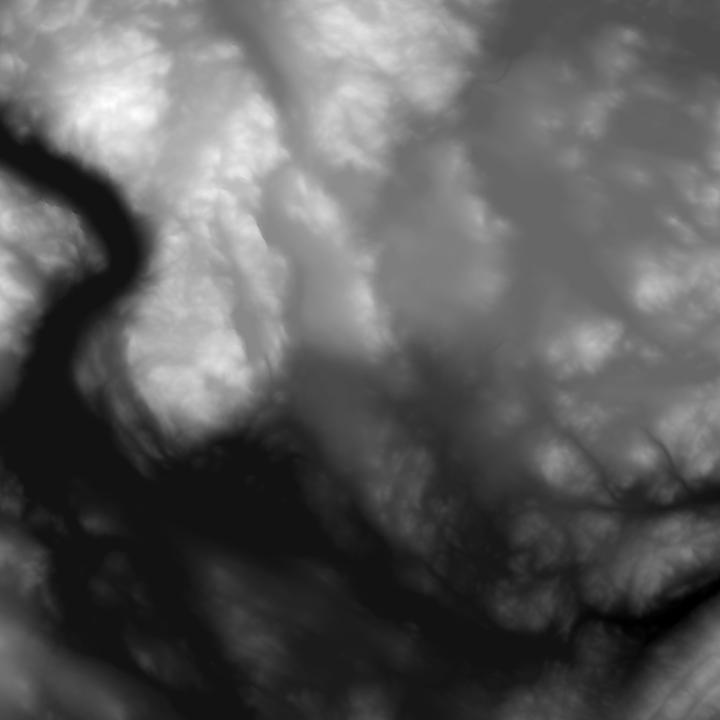

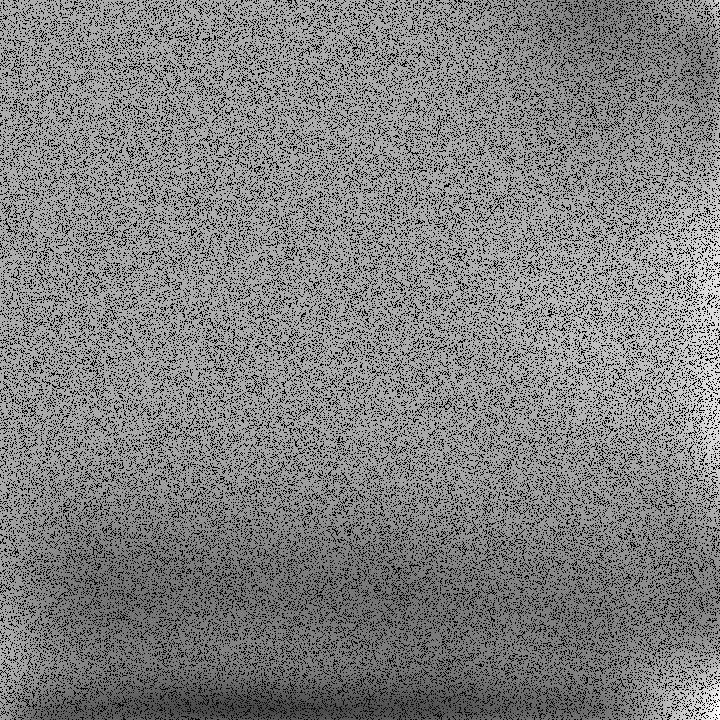

In [40]:
# Save file as <filename>
filename1 = 'SRTM_data_Norway_11.jpg'
filename  = 'SRTM_data_Norway_degree_20.jpg'

terrain1T = np.array(terrain_t)

imwrite(filename, terrain1T)   #[:, :, 0])     # gray scale

# display image
img = Image(filename = filename1, width=250, height=250)   #  #data=terrain1 original
img2 = Image(filename = filename, width=250, height=250)   #  #data=terrain1

display(img, img2)